In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/빅데이터/05_통계와 파이썬_업데이트 V2/data/data_galton.csv', header='infer')

In [5]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


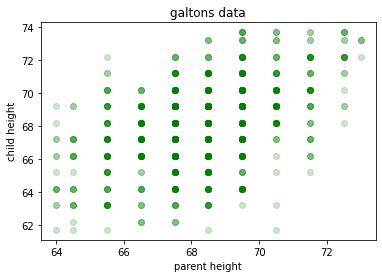

In [7]:
plt.scatter(df.parent,df.child,c = 'green',alpha = 0.2)
plt.xlabel('parent height')
plt.ylabel('child height')
plt.title('galtons data')
plt.show()

In [6]:
myTable = pd.crosstab(df.parent,df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [12]:
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x, y, myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


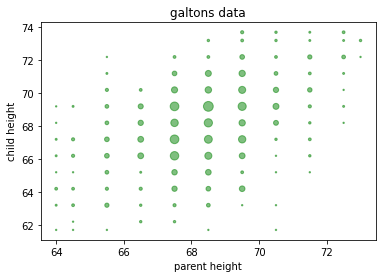

In [15]:
plt.scatter(combo.x,combo.y,s = combo.freq * 2 ,c = 'green',alpha = 0.5)
plt.xlabel('parent height')
plt.ylabel('child height')
plt.title('galtons data')
plt.show()

In [16]:
lm = LinearRegression(fit_intercept=True)

In [17]:
lm.fit(X = df[['parent']],y = df[['child']] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lm.intercept_

array([23.94153018])

In [20]:
lm.coef_

array([[0.64629058]])

Y = 0.64629058 * X + 23.94153018

In [22]:
predY = lm.predict(df[['parent']])

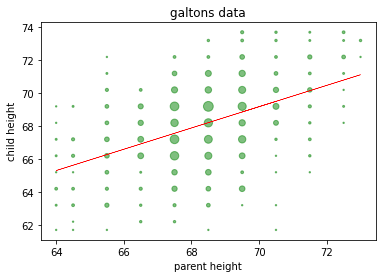

In [23]:
plt.plot(df.parent,predY,c=  'red', linestyle = '-',linewidth = 0.5) #선형 회귀 
plt.scatter(combo.x,combo.y,s = combo.freq * 2 ,c = 'green',alpha = 0.5)
plt.xlabel('parent height')
plt.ylabel('child height')
plt.title('galtons data')
plt.show()